In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_moons

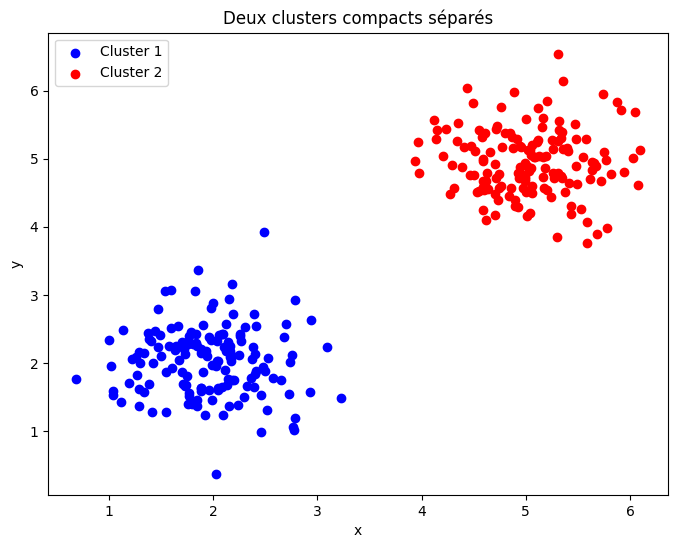

In [ ]:
np.random.seed(42)

# Nombre de points
n_points = 300
n_cluster = n_points // 2  # 150 points par cluster

# Paramètres du premier cluster (centre et écart)
center1 = [2, 2]
spread1 = 0.5  # plus petit = plus compact
x1 = np.random.normal(center1[0], spread1, n_cluster)
y1 = np.random.normal(center1[1], spread1, n_cluster)

# Paramètres du deuxième cluster (centre décalé par 3 unités)
center2 = [center1[0] + 3, center1[1] + 3]  # séparation volontaire
spread2 = 0.5
x2 = np.random.normal(center2[0], spread2, n_cluster)
y2 = np.random.normal(center2[1], spread2, n_cluster)

# Combinaison des deux clusters
X = np.concatenate([x1, x2])
Y = np.concatenate([y1, y2])

# Création du DataFrame
df = pd.DataFrame({'x': X, 'y': Y})

# Visualisation
plt.figure(figsize=(8,6))
plt.scatter(x1, y1, color='blue', label='Cluster 1')
plt.scatter(x2, y2, color='red', label='Cluster 2')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Deux clusters compacts séparés')
plt.legend()
plt.show()


Accuracy sur l'ensemble des points : 1.00


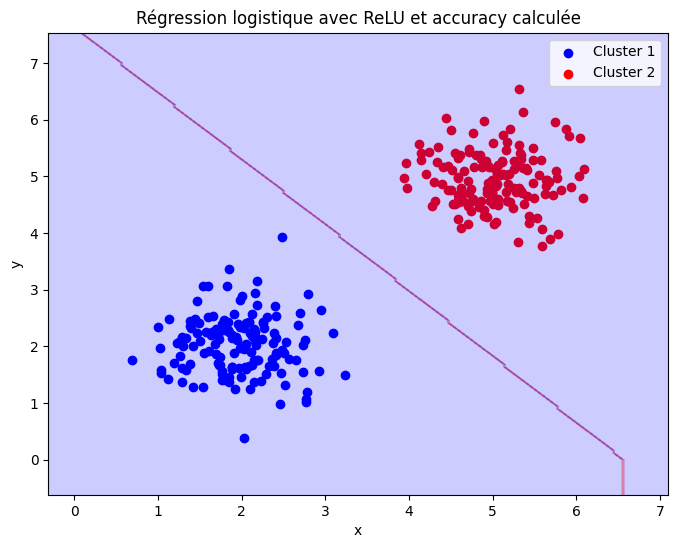

In [ ]:
# Labels
labels = np.array([0]*150 + [1]*150)
X_data = df[['x','y']].values
y_data = labels

# Fonction ReLU
def relu(X):
    return np.maximum(0, X)

# Pipeline : ReLU puis régression logistique
pipeline = Pipeline([
    ('relu', FunctionTransformer(relu)),
    ('logreg', LogisticRegression())
])

# Entraînement
pipeline.fit(X_data, y_data)

# Calcul de l'accuracy
accuracy = pipeline.score(X_data, y_data)
print(f"Accuracy sur l'ensemble des points : {accuracy:.2f}")

# Visualisation
plt.figure(figsize=(8,6))
plt.scatter(X_data[y_data==0,0], X_data[y_data==0,1], color='blue', label='Cluster 1')
plt.scatter(X_data[y_data==1,0], X_data[y_data==1,1], color='red', label='Cluster 2')

# Grille pour la frontière
x_min, x_max = X_data[:,0].min() - 1, X_data[:,0].max() + 1
y_min, y_max = X_data[:,1].min() - 1, X_data[:,1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = pipeline.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.2, colors=['blue', 'red'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Régression logistique avec ReLU et accuracy calculée')
plt.legend()
plt.show()


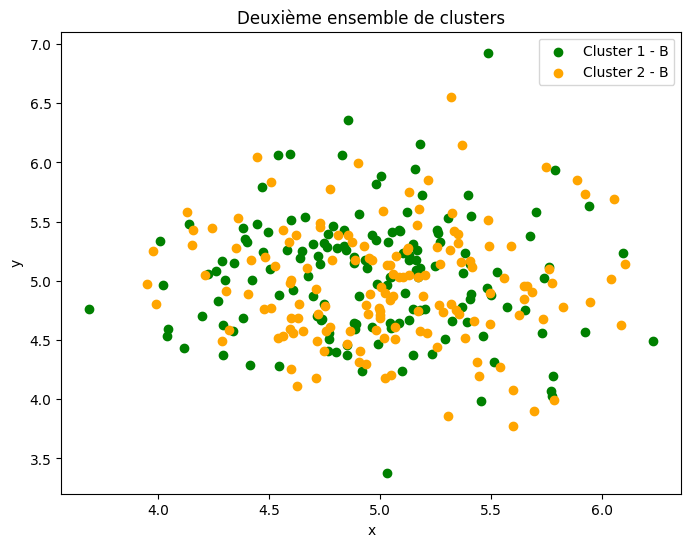

In [ ]:
np.random.seed(42)

# Nombre de points
n_points = 300
n_cluster = n_points // 2  # 150 points par cluster

# Paramètres du premier cluster (centre et écart)
center1_b = [5, 5]
spread1_b = 0.5  # compact
x1_b = np.random.normal(center1_b[0], spread1_b, n_cluster)
y1_b = np.random.normal(center1_b[1], spread1_b, n_cluster)

# Paramètres du deuxième cluster (centre très proche)
center2_b = [5 + 0.01, 5 + 0.01]
spread2_b = 0.5
x2_b = np.random.normal(center2_b[0], spread2_b, n_cluster)
y2_b = np.random.normal(center2_b[1], spread2_b, n_cluster)

# Combinaison des deux clusters
X_b = np.concatenate([x1_b, x2_b])
Y_b = np.concatenate([y1_b, y2_b])

# Création du DataFrame
df_b = pd.DataFrame({'x': X_b, 'y': Y_b})

# Visualisation
plt.figure(figsize=(8,6))
plt.scatter(x1_b, y1_b, color='green', label='Cluster 1 - B')
plt.scatter(x2_b, y2_b, color='orange', label='Cluster 2 - B')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Deuxième ensemble de clusters')
plt.legend()
plt.show()


Accuracy sur l'ensemble des points du deuxième dataset: 0.56


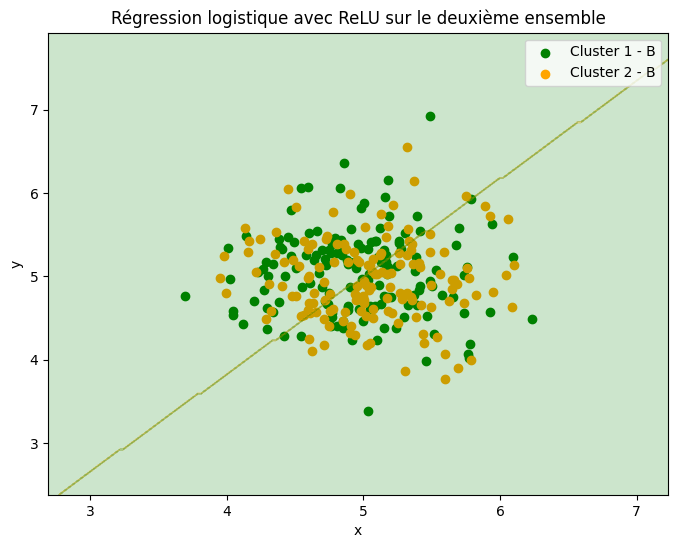

In [ ]:
# Labels pour le deuxième ensemble
labels_b = np.array([0]*150 + [1]*150)
X_data_b = df_b[['x', 'y']].values
y_data_b = labels_b

# Fonction ReLU
def relu(X):
    return np.maximum(0, X)

# Pipeline : ReLU puis régression logistique
pipeline_b = Pipeline([
    ('relu', FunctionTransformer(relu)),
    ('logreg', LogisticRegression())
])

# Entraînement
pipeline_b.fit(X_data_b, y_data_b)

# Calcul de l'accuracy
accuracy_b = pipeline_b.score(X_data_b, y_data_b)
print(f"Accuracy sur l'ensemble des points du deuxième dataset: {accuracy_b:.2f}")

# Visualisation
plt.figure(figsize=(8,6))
plt.scatter(X_data_b[y_data_b==0,0], X_data_b[y_data_b==0,1], color='green', label='Cluster 1 - B')
plt.scatter(X_data_b[y_data_b==1,0], X_data_b[y_data_b==1,1], color='orange', label='Cluster 2 - B')

# Grille pour la frontière
x_min, x_max = X_data_b[:,0].min() - 1, X_data_b[:,0].max() + 1
y_min, y_max = X_data_b[:,1].min() - 1, X_data_b[:,1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = pipeline_b.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.2, colors=['green', 'orange'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Régression logistique avec ReLU sur le deuxième ensemble')
plt.legend()
plt.show()


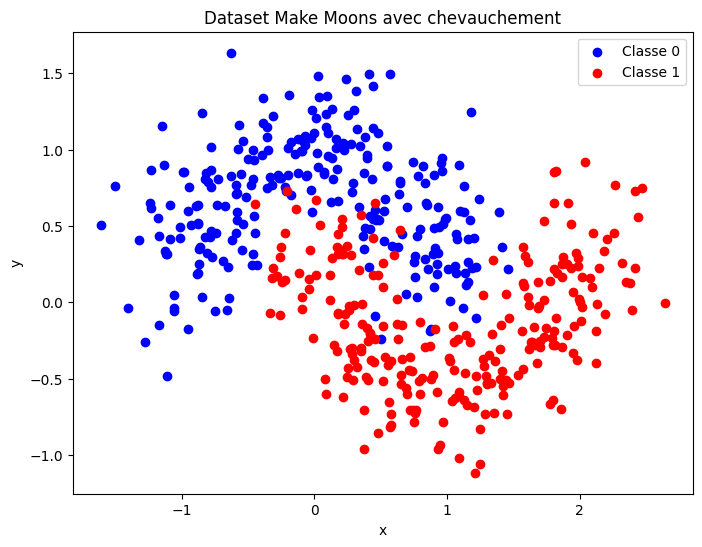

In [24]:

# Génération du dataset avec moins de séparation (plus de chevauchement)
X_moons, y_moons = make_moons(n_samples=500, noise=0.25, random_state=42)  # bruit augmenté

# Visualisation
plt.figure(figsize=(8,6))
plt.scatter(X_moons[y_moons==0,0], X_moons[y_moons==0,1], color='blue', label='Classe 0')
plt.scatter(X_moons[y_moons==1,0], X_moons[y_moons==1,1], color='red', label='Classe 1')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dataset Make Moons avec chevauchement')
plt.legend()
plt.show()


Accuracy sur le dataset Make Moons : 0.84


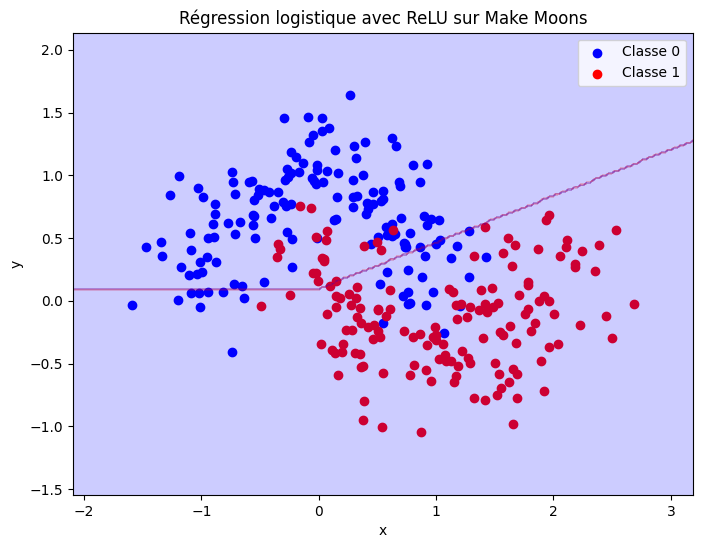

In [25]:

# Génération du dataset moins séparé
X_moons, y_moons = make_moons(n_samples=300, noise=0.25, random_state=42)

# Fonction ReLU
def relu(X):
    return np.maximum(0, X)

# Pipeline : ReLU puis régression logistique
pipeline_moons = Pipeline([
    ('relu', FunctionTransformer(relu)),
    ('logreg', LogisticRegression())
])

# Entraînement
pipeline_moons.fit(X_moons, y_moons)

# Calcul de l'accuracy
accuracy_moons = pipeline_moons.score(X_moons, y_moons)
print(f"Accuracy sur le dataset Make Moons : {accuracy_moons:.2f}")

# Visualisation
plt.figure(figsize=(8,6))
plt.scatter(X_moons[y_moons==0,0], X_moons[y_moons==0,1], color='blue', label='Classe 0')
plt.scatter(X_moons[y_moons==1,0], X_moons[y_moons==1,1], color='red', label='Classe 1')

# Grille pour la frontière
x_min, x_max = X_moons[:,0].min() - 0.5, X_moons[:,0].max() + 0.5
y_min, y_max = X_moons[:,1].min() - 0.5, X_moons[:,1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = pipeline_moons.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.2, colors=['blue', 'red'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Régression logistique avec ReLU sur Make Moons')
plt.legend()
plt.show()